Arthur Pochic 
Kenza
Sarah THERET
AImie GARREC
ING3 DS

# Méthode de l'écart interquartile

On import le fichier sonar.all-data.csv et on nomme les colonnes d'observations de F1 à F60 ainsi que la variable cible comme OBJET.

In [2]:
#Aquisition des données
import pandas as pnd
#observations = pnd.read_csv("datas/sonar.all-data.csv")

import pandas as pnd
observations = pnd.read_csv("sonar.all-data.csv", names=["F1","F2","F3","F4","F5","F6","F7","F8","F9",
                                                      "F10","F11","F12","F13","F14","F15","F16","F17","F18","F19",
                                                      "F20","F21","F22","F23","F24","F25","F26","F27","F28","F29",
                                                      "F30","F31","F32","F33","F34","F35","F36","F37","F38","F39",
                                                      "F40","F41","F42","F43","F44","F45","F46","F47","F48","F49",
                                                      "F50","F51","F52","F53","F54","F55","F56","F57","F58","F59",
                                                      "F60","OBJET"])
observations.head(2)
print(observations['OBJET'].value_counts())
print(observations.columns.values)
print(observations.shape)

OBJET
M    111
R     97
Name: count, dtype: int64
['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10' 'F11' 'F12' 'F13'
 'F14' 'F15' 'F16' 'F17' 'F18' 'F19' 'F20' 'F21' 'F22' 'F23' 'F24' 'F25'
 'F26' 'F27' 'F28' 'F29' 'F30' 'F31' 'F32' 'F33' 'F34' 'F35' 'F36' 'F37'
 'F38' 'F39' 'F40' 'F41' 'F42' 'F43' 'F44' 'F45' 'F46' 'F47' 'F48' 'F49'
 'F50' 'F51' 'F52' 'F53' 'F54' 'F55' 'F56' 'F57' 'F58' 'F59' 'F60' 'OBJET']
(208, 61)


In [3]:
observations["OBJET"].head(2)

0    R
1    R
Name: OBJET, dtype: object


Nous allons identifier les valeurs extrêmes présentes dans les lignes du dataset.
Une donnée est considérée comme aberrante lorsque l’écart absolu par rapport à Q1 ou Q3 dépasse 1,5 fois l’écart interquartile (IQR).
Plus concrètement :
- une valeur est dite aberrante faible si elle est inférieure à Q1 - 1.5 * (Q3 - Q1),
- et aberrante élevée si elle est supérieure à Q3 + 1.5 * (Q3 - Q1).

Enfin, nous supprimerons les lignes contenant au moins 7 valeurs aberrantes.


In [4]:
#rendre la colonne Objet numérique
observations['OBJET'] = observations['OBJET'].map({'M': 1, 'R': 0})
print(observations['OBJET'])

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: OBJET, Length: 208, dtype: int64


In [5]:
#On crée la liste des colonnes à traiter
colonnes = [col for col in observations.columns if col != "OBJET"]

#On définit Q1 et Q3 ainsi que IQR
Q1 = observations[colonnes].quantile(0.25)
Q3 = observations[colonnes].quantile(0.75)
IQR = Q3 - Q1



In [6]:
# On parcourt toutes les caractéristiques
import numpy as np

num_lignes = []  # liste qui va contenir les index des données extrêmes

for caracteristique in colonnes:
    print(caracteristique)

    #Pour chaque colonne, on détermine les seuils supérieur et inférieur
    low_bound = Q1[caracteristique] - 1.5 * IQR[caracteristique]
    up_bound = Q3[caracteristique] + 1.5 * IQR[caracteristique]

    #On récupère les indices des lignes pour lesquelles le booléen est True
    indices_extremes = observations[
        (observations[caracteristique] < low_bound) |
        (observations[caracteristique] > up_bound)
    ].index.tolist()

    #On ajoute ces indices à la liste num_lignes
    num_lignes.extend(indices_extremes)

    print(f"liste_donnees_extremes pour la caractéristique {caracteristique} = {indices_extremes}")
    print("------- --------")

# Affichage final des index de toutes les données extrêmes
print("Index de toutes les données extrêmes :", num_lignes)


F1
liste_donnees_extremes pour la caractéristique F1 = [4, 87, 98, 126, 129, 131, 132, 133, 134, 136, 138, 141, 145, 146, 148]
------- --------
F2
liste_donnees_extremes pour la caractéristique F2 = [6, 85, 98, 100, 102, 129, 131, 134, 136, 138, 140, 141, 145]
------- --------
F3
liste_donnees_extremes pour la caractéristique F3 = [6, 85, 98, 100, 102, 111, 129, 138, 141, 142, 148]
------- --------
F4
liste_donnees_extremes pour la caractéristique F4 = [6, 19, 20, 85, 97, 98, 102, 111, 129, 133, 138, 141, 148]
------- --------
F5
liste_donnees_extremes pour la caractéristique F5 = [19, 98, 111, 130, 147]
------- --------
F6
liste_donnees_extremes pour la caractéristique F6 = [1, 19, 20, 90, 91, 130, 138, 143]
------- --------
F7
liste_donnees_extremes pour la caractéristique F7 = [19, 20, 91, 127, 134]
------- --------
F8
liste_donnees_extremes pour la caractéristique F8 = [1, 2, 19, 87, 91, 127, 132, 134, 135, 136, 171]
------- --------
F9
liste_donnees_extremes pour la caractéristiqu

In [7]:
#On ordonne la liste par ordre croissant des index
num_lignes.sort()
print(num_lignes)

#On crée une liste contenant les numéros de lignes à supprimer
num_lignes_a_supprimer_iq=[]

from collections import Counter

#On compte les occurrences par ligne
counts = Counter(num_lignes)

#On sélectionne les lignes avec au moins 7 valeurs aberrantes
num_lignes_a_supprimer_iq = [idx for idx, cnt in counts.items() if cnt > 7]

#On supprime les lignes
cleaned_data_iq = observations.drop(index=num_lignes_a_supprimer_iq).reset_index(drop=True)

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, 5, 5, 6, 6, 6, 16, 16, 16, 16, 17, 17, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 33, 34, 35, 36, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 47, 65, 85, 85, 85, 86, 87, 87, 87, 87, 88, 88, 90, 91, 91, 91, 97, 97, 97, 98, 98, 98, 98, 98, 98, 98, 99, 99, 99, 100, 100, 100, 101, 101, 101, 101, 102, 102, 102, 102, 102, 104, 104, 105, 105, 111, 111, 111, 112, 112, 115, 115, 122, 126, 127, 127, 127, 127, 127, 127, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 134, 134, 134, 134, 134, 134, 134, 134, 134, 135, 135, 135, 135, 135, 135, 135, 135, 135, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 137, 137, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 141, 141, 141, 141, 141, 141, 141, 142

In [8]:
print(num_lignes_a_supprimer_iq)

[19, 22, 44, 131, 133, 134, 135, 136, 138, 140, 142, 146, 147]


<h1>Travail demandé</h1>
Rédigez un état de l’art sur la détection des valeurs aberrantes (outliers) dans les datasets. Vous devez :

1. Présenter les principales méthodes existantes (statistiques classiques, méthodes robustes, techniques basées sur le machine learning, approches graphiques…).

2. Comparer leurs avantages et limites selon le type de données (univariées, multivariées, volumineuses…).

3. Illustrer chaque méthode par des exemples concrets d’application

# Méthode des écarts types

Nous allons maintenant faire le même travail avec une autre méthode. La méthode des écarts types.

In [9]:
#On introduit le paramètre pour la règle des écarts types. Généralement 3 (≈99.7% des données selon la loi normale).
k = 3

In [10]:
# On parcourt toutes les caractéristiques
import numpy as np

num_lignes = []  # liste qui va contenir les index des données extrêmes

for caracteristique in colonnes:

    #Pour chaque colonne, on détermine la moyenne et l'écart type
    mean = observations[caracteristique].mean()
    std = observations[caracteristique].std()

    #On récupère les indices des lignes pour lesquelles le booléen est True
    indices_extremes = observations[
        (observations[caracteristique] < mean-k*std) |
        (observations[caracteristique] > mean+k*std)
    ].index.tolist()

    #On ajoute ces indices à la liste num_lignes
    num_lignes.extend(indices_extremes)

    #print(f"liste_donnees_extremes pour la caractéristique {caracteristique} = {indices_extremes}")
    #print("------- --------")

# Affichage final des index de toutes les données extrêmes
print("Index de toutes les données extrêmes :", num_lignes)

Index de toutes les données extrêmes : [98, 129, 131, 134, 136, 146, 85, 98, 145, 85, 98, 111, 138, 98, 111, 19, 98, 111, 147, 20, 91, 91, 134, 19, 132, 134, 135, 136, 2, 132, 133, 134, 135, 136, 2, 133, 137, 137, 184, 2, 101, 129, 5, 127, 5, 21, 3, 22, 3, 22, 44, 22, 22, 143, 146, 44, 146, 44, 186, 140, 141, 143, 146, 147, 186, 22, 140, 146, 161, 186, 22, 138, 146, 22, 140, 146, 22, 33, 140, 145, 147, 140, 146, 136, 138, 143, 144, 146, 133, 147, 129, 135, 142, 127, 142, 147, 105, 135, 147, 2, 87, 147, 101, 112, 127, 147, 65, 97, 142, 97, 98, 141]


In [11]:
#On ordonne la liste par ordre croissant des index
num_lignes.sort()
print(num_lignes)

#On crée une liste contenant les numéros de lignes à supprimer
num_lignes_a_supprimer_et=[]

from collections import Counter

#On compte les occurrences par ligne
counts = Counter(num_lignes)

#On sélectionne les lignes avec au moins 7 valeurs aberrantes
num_lignes_a_supprimer_et= [idx for idx, cnt in counts.items() if cnt > 7]

#On supprime les lignes
cleaned_data_et = observations.drop(index=num_lignes_a_supprimer_et).reset_index(drop=True)

[2, 2, 2, 2, 3, 3, 5, 5, 19, 19, 20, 21, 22, 22, 22, 22, 22, 22, 22, 22, 33, 44, 44, 44, 65, 85, 85, 87, 91, 91, 97, 97, 98, 98, 98, 98, 98, 98, 101, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129, 129, 131, 132, 132, 133, 133, 133, 134, 134, 134, 134, 135, 135, 135, 135, 136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140, 140, 140, 141, 141, 142, 142, 142, 143, 143, 143, 144, 145, 145, 146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147, 147, 147, 147, 147, 161, 184, 186, 186, 186]


In [12]:
print(num_lignes_a_supprimer_et)

[22, 146, 147]


# Méthodes des tests statistiques : Test de Grubbs

import numpy as np
from scipy import stats
from collections import Counter

#Définition de la fonction grubbs_test
def grubbs_test(values, alpha=0.05):
    n = len(values)
    mean = np.mean(values)
    std = np.std(values, ddof=1)

    #Statistique G
    abs_diffs = np.abs(values - mean)
    max_idx = np.argmax(abs_diffs)
    G = abs_diffs[max_idx] / std

    #Valeur critique
    t_crit = stats.t.ppf(1 - alpha / (2*n), n-2)
    G_crit = ((n-1)/np.sqrt(n)) * np.sqrt(t_crit**2 / (n-2 + t_crit**2))

    return G, G_crit, max_idx

num_lignes = []

for caracteristique in colonnes:
    indices_outliers_col = []
    data = observations[caracteristique].values
    data_copy = data.copy()
    indices_copy = np.arange(len(data))

    while True:
      G, G_crit, idx = grubbs_test(data_copy, alpha=0.05)
      if G > G_crit:
        #On ajoute l’indice original
        indices_outliers_col.append(int(indices_copy[idx]))
        #On supprime de la copie
        data_copy = np.delete(data_copy, idx)
        indices_copy = np.delete(indices_copy, idx)
      else:
        break

    print(caracteristique)
    print(f"liste_donnees_extremes pour {caracteristique} = {indices_outliers_col}")
    print("------- --------")

    #On ajoute ces indices à la liste num_lignes
    num_lignes.extend(indices_outliers_col)

    # Affichage final des index de toutes les données extrêmes
print("Index de toutes les données extrêmes :", num_lignes)

#On ordonne la liste par ordre croissant des index
num_lignes.sort()
print(num_lignes)

#On crée une liste contenant les numéros de lignes à supprimer
num_lignes_a_supprimer=[]

from collections import Counter

#On compte les occurrences par ligne
counts = Counter(num_lignes)

#On sélectionne les lignes avec au moins 7 valeurs aberrantes
num_lignes_a_supprimer = [idx for idx, cnt in counts.items() if cnt > 7]

#On supprime les lignes
cleaned_data = observations.drop(index=num_lignes_a_supprimer).reset_index(drop=True)

In [13]:
#print(num_lignes_a_supprimer)

# Methodes Robustes : 

## 1- Z score

In [40]:
import numpy as np
import pandas as pd
from collections import Counter

# Liste des colonnes numériques à traiter
colonnes = [col for col in observations.columns if col != "OBJET"]

num_lignes = []  # index des données extrêmes

# Parcours des colonnes
for caracteristique in colonnes:

    # Médiane et MAD
    median = observations[caracteristique].median()
    mad = np.median(np.abs(observations[caracteristique] - median))

    # Z-score robuste
    z_robust = (observations[caracteristique] - median) / (1.4826 * mad)

    # Indices extrêmes selon le seuil (3.5 est une valeur courante)
    indices_extremes = observations[np.abs(z_robust) > 3.5].index.tolist()

    num_lignes.extend(indices_extremes)

    #print(f"liste_donnees_extremes pour {caracteristique} = {indices_extremes}")
    #print("------- --------")

# Index de toutes les données extrêmes
#print("Index de toutes les données extrêmes :", num_lignes)

# Tri
num_lignes.sort()
#print(num_lignes)

# Comptage par ligne
counts = Counter(num_lignes)

# Critère : au moins 7 valeurs extrêmes sur la même ligne
num_lignes_a_supprimer_zr = [idx for idx, cnt in counts.items() if cnt > 7]
print(num_lignes_a_supprimer_zr)


# Nettoyage des données
cleaned_data_zr = observations.drop(index=num_lignes_a_supprimer_zr).reset_index(drop=True)


[22, 140, 146, 147]


## 2.MCD

In [42]:
import numpy as np
import pandas as pd
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Sélection des colonnes numériques (toutes sauf OBJET)
colonnes = [col for col in observations.columns if col != "OBJET"]

# Appliquer MCD
mcd = MinCovDet().fit(observations[colonnes])
mahal_dist = mcd.mahalanobis(observations[colonnes])  # distances robustes

# Définir le seuil chi2 à 95%
p = observations[colonnes].shape[1]  # nombre de variables utilisées
threshold = chi2.ppf(0.95, df=p)

# Identifier les outliers
outlier_mask = mahal_dist > threshold
num_lignes_a_supprimer_mcd = np.where(outlier_mask)[0]

print(f"Nombre d'outliers détectés : {len(num_lignes_a_supprimer_mcd)}")
print("Indices ouliers MCD  :", num_lignes_a_supprimer_mcd)

Nombre d'outliers détectés : 93
Indices ouliers MCD  : [  0   1   2   3   4   5   6   7   8  11  12  13  14  15  16  17  19  20
  21  22  24  26  27  28  29  30  31  32  33  34  35  43  44  45  46  47
  49  50  65  75  76  85  86  87  90  91  93  94  95  96  97  98  99 100
 101 102 103 104 105 111 115 118 127 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 152 164 171 174 180 181
 183 186 207]


# DBSCAN

In [18]:
!pip install kneed



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import numpy as np

scaler = StandardScaler()
obs_scaled = scaler.fit_transform(observations)

min_samples = 5
neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(obs_scaled)
distances, indices = neigh.kneighbors(obs_scaled)
distances = np.sort(distances[:, -1])

knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
eps_optimal = distances[knee.knee]

dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples)
labels = dbscan.fit_predict(obs_scaled)

num_lignes_a_supprimer_dbscan = observations[labels == -1].index.tolist()
print("eps optimal estimé :", eps_optimal)
print("Anomalies :", num_lignes_a_supprimer_dbscan)


eps optimal estimé : 10.095486961022068
Anomalies : [97, 98, 138, 147]


# Scatter plot / Pair plot :

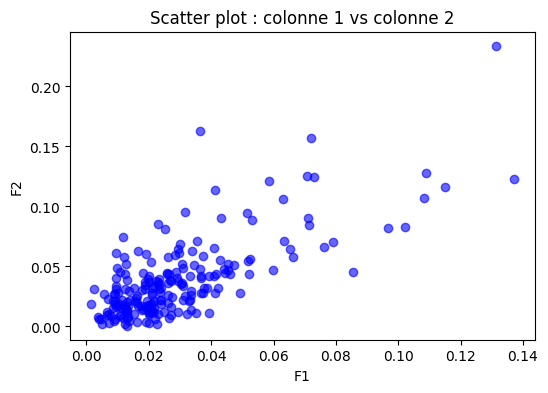

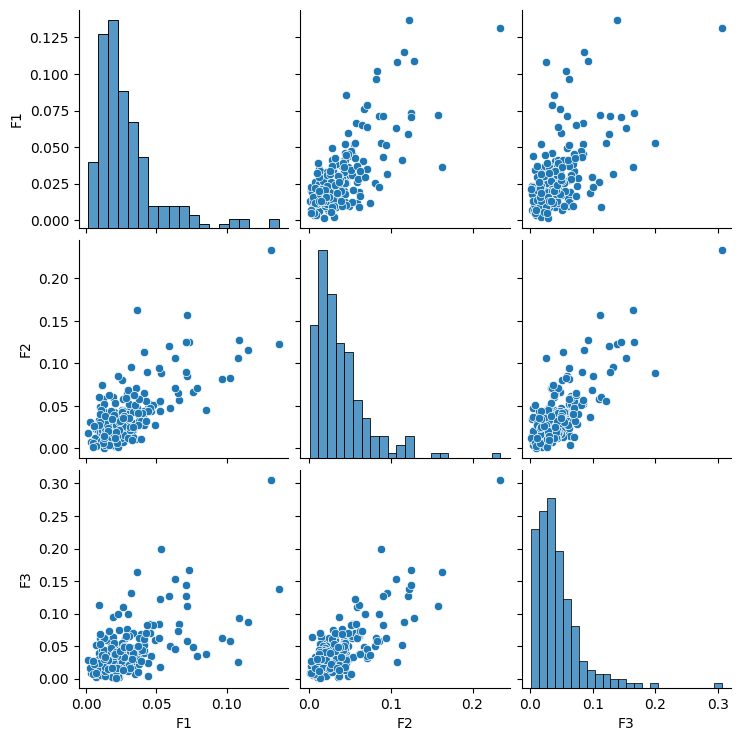

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(observations.iloc[:, 0], observations.iloc[:, 1], c='blue', alpha=0.6)
plt.xlabel(observations.columns[0])
plt.ylabel(observations.columns[1])
plt.title('Scatter plot : colonne 1 vs colonne 2')
plt.show()

subset = observations.iloc[:, :3] 
sns.pairplot(subset)
plt.show()


# Histogramme/HBOS

In [23]:
! pip install pyod


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


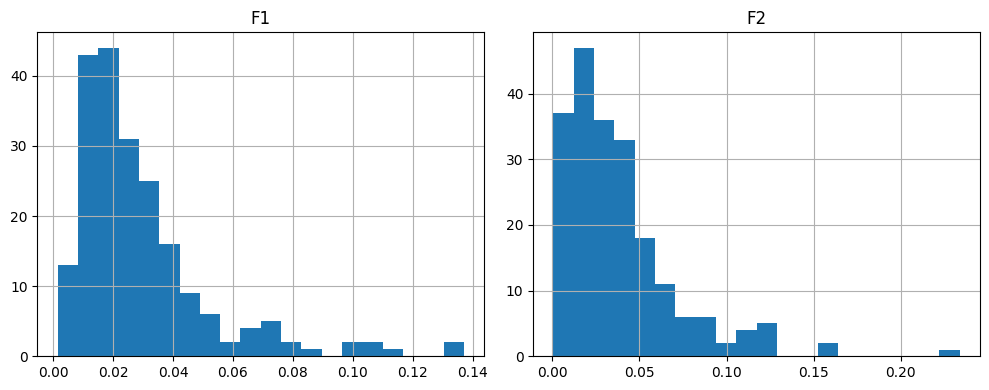

[6, 21, 85, 98, 100, 102, 111, 129, 131, 132, 134, 136, 137, 138, 141, 142, 145, 146, 147, 148, 176]


In [24]:
import matplotlib.pyplot as plt
from pyod.models.hbos import HBOS
from sklearn.preprocessing import StandardScaler

# Histogrammes des 2 premières variables
observations.iloc[:, :2].hist(bins=20, figsize=(10, 4))
plt.tight_layout()
plt.show()

# Normalisation
scaler = StandardScaler()
obs_scaled = scaler.fit_transform(observations.iloc[:, :3])
# HBOS
hbos = HBOS()
hbos.fit(obs_scaled)
labels = hbos.labels_  # 0 = normal, 1 = anomalie

num_lignes_a_supprimer_hbos = observations.iloc[:, :3][labels == 1].index.tolist()
print(num_lignes_a_supprimer_hbos)

# QQ Plot

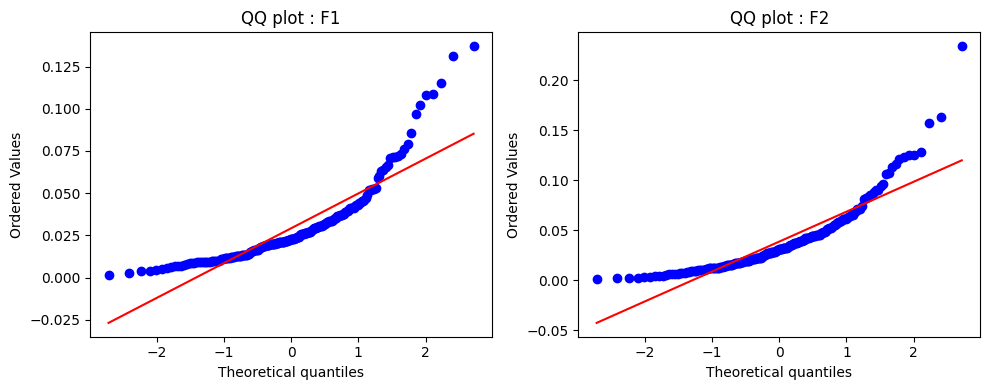

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt

variables = observations.iloc[:, :2]  

plt.figure(figsize=(10, 4))

for i, col in enumerate(variables.columns, 1):
    plt.subplot(1, 2, i)
    stats.probplot(variables[col], dist="norm", plot=plt)
    plt.title(f"QQ plot : {col}")

plt.tight_layout()
plt.show()


# HeatMaps

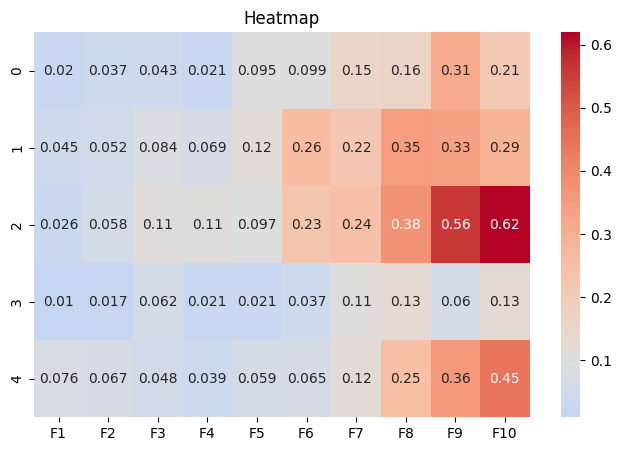

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = observations.iloc[:5, :10]

plt.figure(figsize=(8, 5))
sns.heatmap(subset, annot=True, cmap='coolwarm', center=subset.median().median())
plt.title("Heatmap")
plt.show()


# t-SNE

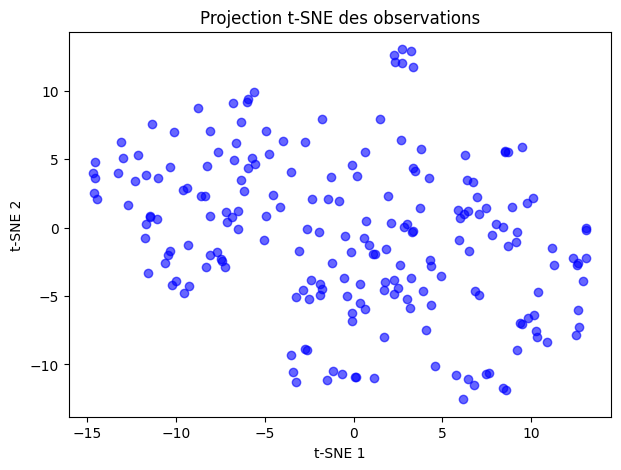

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

scaler = StandardScaler()
obs_scaled = scaler.fit_transform(observations)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(obs_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.6)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Projection t-SNE des observations')
plt.show()


# ONE-CLASS SVM

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import numpy as np

scaler = StandardScaler()
obs_scaled = scaler.fit_transform(observations)

# nu ≈ fraction max attendue d'anomalies (ex : 5%)
nu = 0.05
ocsvm = OneClassSVM(kernel="rbf", gamma="scale", nu=nu)

# entraînement + prédiction
ocsvm.fit(obs_scaled)
labels = ocsvm.predict(obs_scaled)          # +1 = normal, -1 = anomalie
scores = ocsvm.decision_function(obs_scaled)  # >0 = normal, <0 = anomalie

idx_anomalies = np.where(labels == -1)[0].tolist()
print("nu utilisé (taux d'anomalies visé) :", nu)
print("Anomalies (One-Class SVM) :", idx_anomalies)
print("Nombre d'anomalies :", len(idx_anomalies))

nu utilisé (taux d'anomalies visé) : 0.05
Anomalies (One-Class SVM) : [2, 3, 9, 12, 21, 24, 25, 43, 64, 70, 80, 87, 90, 91, 95, 97, 100, 101, 104, 127, 130, 131, 136, 140, 142, 144, 150, 161, 164, 167, 176, 196]
Nombre d'anomalies : 32


# ISOLATION FOREST

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import numpy as np

scaler = StandardScaler()
obs_scaled = scaler.fit_transform(observations)

# contamination ≈ proportion attendue d'anomalies (ex : 5%)
contamination = 0.05
iso = IsolationForest(
    n_estimators=300,        # plus d'arbres = plus stable
    max_samples="auto",
    contamination=contamination,
    random_state=42,
    n_jobs=-1
)

# entraînement + prédiction
iso.fit(obs_scaled)
labels = iso.predict(obs_scaled)                 # 1 = normal, -1 = anomalie
scores = iso.decision_function(obs_scaled)       # >0 = normal, <0 = anomalie

idx_anomalies = np.where(labels == -1)[0].tolist()
print("contamination utilisée (taux visé) :", contamination)
print("Anomalies (Isolation Forest) :", idx_anomalies)
print("Nombre d'anomalies :", len(idx_anomalies))

contamination utilisée (taux visé) : 0.05
Anomalies (Isolation Forest) : [22, 44, 98, 131, 133, 134, 135, 136, 140, 146, 147]
Nombre d'anomalies : 11


# AUTOENCODER

In [31]:
! pip install tensorflow

   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   - -------------------------------------- 8.4/331.8 MB 47.5 MB/s eta 0:00:07
   - -------------------------------------- 8.4/331.8 MB 47.5 MB/s eta 0:00:07
   - -------------------------------------- 12.1/331.8 MB 19.4 MB/s eta 0:00:17
   -- ------------------------------------- 22.0/331.8 MB 26.8 MB/s eta 0:00:12
   --- ------------------------------------ 29.6/331.8 MB 28.1 MB/s eta 0:00:11
   ----- ---------------------------------- 42.2/331.8 MB 33.2 MB/s eta 0:00:09
   ------ --------------------------------- 55.1/331.8 MB 36.9 MB/s eta 0:00:08
   -------- ------------------------------- 68.7/331.8 MB 40.2 MB/s eta 0:00:07
   --------- ------------------------------ 80.7/331.8 MB 42.2 MB/s eta 0:00:06
   ----------- ---------------------------- 94.4/331.8 MB 44.3 MB/s eta 0:00:06
   ------------ -------------------------- 108.3/331.8 MB 46.1 MB/s eta 0:00:05
   -------------- ------------------------ 122.4/33


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

# Prétraitement
obs_scaled = StandardScaler().fit_transform(observations)
n_features, latent = obs_scaled.shape[1], max(2, obs_scaled.shape[1]//4)

# Autoencoder simple
inputs = layers.Input((n_features,))
encoded = layers.Dense(64, activation="relu")(inputs)
bottleneck = layers.Dense(latent, activation="relu")(encoded)
decoded = layers.Dense(64, activation="relu")(bottleneck)
outputs = layers.Dense(n_features)(decoded)

ae = models.Model(inputs, outputs)
ae.compile(optimizer="adam", loss="mse")
ae.fit(obs_scaled, obs_scaled, epochs=100, batch_size=64, verbose=0, validation_split=0.1)

# Erreur de reconstruction
recon_err = np.mean((obs_scaled - ae.predict(obs_scaled, verbose=0))**2, axis=1)
threshold = np.quantile(recon_err, 0.95)  # ≈ 5% anomalies

labels = np.where(recon_err > threshold, -1, 1)
idx_anomalies = np.where(labels == -1)[0].tolist()

print("Seuil :", threshold)
print("Anomalies (Autoencoder) :", idx_anomalies)
print("Nombre d'anomalies :", len(idx_anomalies))

Seuil : 0.4604779906537035
Anomalies (Autoencoder) : [2, 6, 33, 87, 127, 137, 138, 142, 145, 146, 203]
Nombre d'anomalies : 11


 # GANs (Generative Adversarial Networks)

In [33]:
import numpy as np, tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

obs_scaled = StandardScaler().fit_transform(observations).astype("float32")
n, d, z_dim = obs_scaled.shape[0], obs_scaled.shape[1], max(8, obs_scaled.shape[1]//2)

# Générateur & Discriminateur
G = models.Sequential([layers.Input((z_dim,)), layers.Dense(2*d, "relu"), layers.Dense(2*d,"relu"), layers.Dense(d)])
D = models.Sequential([layers.Input((d,)), layers.Dense(2*d,"relu"), layers.Dense(d,"relu"), layers.Dense(1,"sigmoid")])

bce, g_opt, d_opt = tf.keras.losses.BinaryCrossentropy(), tf.keras.optimizers.Adam(1e-3), tf.keras.optimizers.Adam(1e-3)

def train_step(x):
    z = tf.random.normal((tf.shape(x)[0], z_dim))
    with tf.GradientTape() as td, tf.GradientTape() as tg:
        x_fake = G(z, training=True)
        d_loss = bce(tf.ones_like(D(x)), D(x)) + bce(tf.zeros_like(D(x_fake)), D(x_fake))
        g_loss = bce(tf.ones_like(D(x_fake)), D(x_fake))
    d_opt.apply_gradients(zip(td.gradient(d_loss, D.trainable_variables), D.trainable_variables))
    g_opt.apply_gradients(zip(tg.gradient(g_loss, G.trainable_variables), G.trainable_variables))

# Entraînement
ds = tf.data.Dataset.from_tensor_slices(obs_scaled).shuffle(n).batch(64, drop_remainder=True)
for _ in range(50):
    for xb in ds: train_step(xb)

# Inférence AnoGAN-lite
def infer_z(x, iters=100, lr=0.05):
    z = tf.Variable(tf.random.normal((1,z_dim))); opt = tf.keras.optimizers.Adam(lr)
    x_tf = tf.convert_to_tensor(x[None,:])
    for _ in range(iters):
        with tf.GradientTape() as t: loss = tf.reduce_mean((x_tf - G(z))**2)
        opt.apply_gradients(zip(t.gradient(loss,[z]),[z]))
    return float(tf.reduce_mean((x_tf-G(z))**2))

recon_err = np.array([infer_z(x) for x in obs_scaled])
threshold = np.quantile(recon_err, .95)    # ≈5% anomalies
labels = np.where(recon_err > threshold, -1, 1)
idx_anomalies = np.where(labels==-1)[0].tolist()

print("Seuil :", threshold)
print("Anomalies (GAN) :", idx_anomalies, "Nombre :", len(idx_anomalies))

Seuil : 2.2444695472717284
Anomalies (GAN) : [2, 22, 44, 98, 133, 134, 135, 136, 140, 146, 147] Nombre : 11


# Comparaison 

In [43]:
print(num_lignes_a_supprimer_zr)
print(num_lignes_a_supprimer_et)
print(num_lignes_a_supprimer_iq)
print(num_lignes_a_supprimer_mcd)
print(num_lignes_a_supprimer_dbscan)
print(num_lignes_a_supprimer_hbos)

[22, 140, 146, 147]
[22, 146, 147]
[19, 22, 44, 131, 133, 134, 135, 136, 138, 140, 142, 146, 147]
[  0   1   2   3   4   5   6   7   8  11  12  13  14  15  16  17  19  20
  21  22  24  26  27  28  29  30  31  32  33  34  35  43  44  45  46  47
  49  50  65  75  76  85  86  87  90  91  93  94  95  96  97  98  99 100
 101 102 103 104 105 111 115 118 127 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 152 164 171 174 180 181
 183 186 207]
[97, 98, 138, 147]
[6, 21, 85, 98, 100, 102, 111, 129, 131, 132, 134, 136, 137, 138, 141, 142, 145, 146, 147, 148, 176]


# Interprétation des résultats

Pas de surprise si la méthode MCD détecte plusieurs valeurs extrêmes, car il s’agit d’une méthode multivariée globale. MCD examine la distribution conjointe de toutes les variables simultanément. Un point peut sembler “normal” dans chaque variable prise isolément, mais être très atypique lorsqu’on considère toutes les variables ensemble (par exemple, une combinaison inhabituelle de valeurs).

Cela explique également pourquoi Z robuste et l’écart-type ont détecté moins de valeurs : ce sont des méthodes univariées, qui analysent chaque variable séparément.

